In [111]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import random 

In [112]:
train_set = pd.read_csv('TRAIN_SET.csv')
test_set = pd.read_csv('TEST_SET.csv')

In [113]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
 2   RESTAURANT_NAME                   15608 non-null  object 
 3   RESTAURANT_LOCATION               15473 non-null  object 
 4   RESTAURANT_CATEGORY               15543 non-null  object 
 5   ADDRESS                           15603 non-null  object 
 6   CITY                              15437 non-null  object 
 7   STATE                             15464 non-null  object 
 8   ZIP                               15614 non-null  object 
 9   CURRENT_DEMERITS                  15457 non-null  float64
 10  CURRENT_GRADE                     15365 non-null  object 
 11  EMPLOYEE_COUNT                    15580 non-null  float64
 12  MEDI

In [114]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER  7505 non-null   object 
 1   RESTAURANT_PERMIT_NUMBER  7505 non-null   object 
 2   RESTAURANT_NAME           7505 non-null   object 
 3   RESTAURANT_LOCATION       7504 non-null   object 
 4   RESTAURANT_CATEGORY       7505 non-null   object 
 5   ADDRESS                   7503 non-null   object 
 6   CITY                      7502 non-null   object 
 7   STATE                     7505 non-null   object 
 8   ZIP                       7503 non-null   object 
 9   CURRENT_DEMERITS          7505 non-null   int64  
 10  CURRENT_GRADE             7503 non-null   object 
 11  INSPECTION_TIME           7502 non-null   object 
 12  INSPECTION_TYPE           7505 non-null   object 
 13  INSPECTION_DEMERITS       7505 non-null   int64  
 14  VIOLATIO

In [115]:
train_set.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4.0,0.0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5.0,0.0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3.0,1.0
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,...,2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3.0,0.0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,...,2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0.0


In [116]:
# numerical features 
train_set.describe()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
count,15457.000000,15580.00000,15639.000000,15376.000000,15419.000000,15461.000000,15588.000000,15612.000000,15504.000000,15633.000000
mean,5.064372,15.04249,28.015783,4.029535,13.571308,165.233943,171.871953,179.269088,5.730650,0.158127
std,5.186025,8.96682,4.900369,2.016575,8.482041,81.307483,80.079188,77.347049,3.004213,0.364872
min,0.000000,3.00000,18.000000,0.227197,0.000000,1.000000,2.000000,4.000000,3.000000,0.000000
25%,0.000000,8.00000,24.601414,2.551504,8.000000,202.000000,204.000000,209.000000,4.000000,0.000000
50%,5.000000,14.00000,27.968247,3.693207,10.000000,206.000000,211.000000,215.000000,5.000000,0.000000
75%,8.000000,21.00000,31.409235,5.138718,19.000000,211.000000,215.000000,227.000000,7.000000,0.000000
max,100.000000,53.00000,49.614076,16.481163,86.000000,301.000000,302.000000,310.000000,30.000000,1.000000


In [117]:
# categorical features 
train_set.describe(include=['O'])

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_GRADE,INSPECTION_TIME,INSPECTION_TYPE,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE
count,15673,15673,15608,15473,15543,15603,15437,15464,15614,15365,15490,15451,15508,15554,15659,15527,15406,15500
unique,15673,8654,8322,4963,29,4784,19,1,2480,6,14271,2,11397,4940,4718,4,4,4
top,DA1159586,PR0012160,Robertos Taco Shop,CAESARS PALACE HOTEL & CASINO,Restaurant,3400 S Las Vegas Blvd,Las Vegas,Nevada,89109,A,7/12/2012 8:00,Routine Inspection,"214,230,233",2/21/2013 22:26,"(36.1161559, 115.1750576)",Critical,Major,Major
freq,1,12,98,114,9319,138,12375,15464,446,14927,7,14584,67,10146,125,7195,7909,7310


# Exploratory data analysis and Wrangle data

In [118]:
# clean data: remove irrelevant columns
# Intuitively, there may not be correlation between Restaurant_name and inspection_score.
# RESTAURANT_PERMIT_NUMBER should not be included. 
# Only one record is in STATE column, so there is no need to keep it. 
# Obviously, INSPECTION_TIME and RECORD_UPDATED have no relationship between inspection_socre.
# There are already many features regarding to geometric locations, we will not include LAT_LONG_RAW.
# Conclusion
# remove 'RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER', 'RESTAURANT_NAME', 'RESTAURANT_LOCATION','STATE', 'ADDRESS', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'INSPECTION_TIME', 'VIOLATIONS_RAW'
drop_columns_train = ['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER','RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'STATE', 'ADDRESS', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'INSPECTION_TIME', 'VIOLATIONS_RAW']
drop_columns_test = ['RESTAURANT_PERMIT_NUMBER','RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'STATE', 'ADDRESS', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'INSPECTION_TIME', 'VIOLATIONS_RAW']
train_set = train_set.drop(drop_columns_train, axis = 1)
test_set = test_set.drop(drop_columns_test, axis = 1)

In [119]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_CATEGORY               15543 non-null  object 
 1   CITY                              15437 non-null  object 
 2   ZIP                               15614 non-null  object 
 3   CURRENT_DEMERITS                  15457 non-null  float64
 4   CURRENT_GRADE                     15365 non-null  object 
 5   EMPLOYEE_COUNT                    15580 non-null  float64
 6   MEDIAN_EMPLOYEE_AGE               15639 non-null  float64
 7   MEDIAN_EMPLOYEE_TENURE            15376 non-null  float64
 8   INSPECTION_TYPE                   15451 non-null  object 
 9   INSPECTION_DEMERITS               15419 non-null  float64
 10  FIRST_VIOLATION                   15461 non-null  float64
 11  SECOND_VIOLATION                  15588 non-null  float64
 12  THIR

In [120]:
train_set.head()

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Snack Bar,Las Vegas,89169-2617,0.0,A,25.0,27.959983,13.004886,Routine Inspection,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4.0,0.0
1,Restaurant,Las Vegas,89108-4588,3.0,A,7.0,27.719365,3.922086,Routine Inspection,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5.0,0.0
2,Restaurant,Las Vegas,89130-3505,8.0,A,23.0,26.442637,10.312777,Routine Inspection,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3.0,1.0
3,Elementary School Kitchen,Las Vegas,89101-1517,0.0,A,14.0,33.988293,4.163975,Routine Inspection,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3.0,0.0
4,Bar / Tavern,Las Vegas,89169-6574,0.0,A,10.0,21.980282,13.462786,Routine Inspection,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0.0


In [121]:
# analyze by pivoting features
#train_set[['RESTAURANT_CATEGORY', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['RESTAURANT_CATEGORY'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

In [122]:
# number of NaN in each categorical values
category_NaN_num = train_set['RESTAURANT_CATEGORY'].isnull().sum()
city_NaN_num = train_set['CITY'].isna().sum()
ZIP_NaN_num = train_set['ZIP'].isna().sum()
current_demerits_NaN_num = train_set['CITY'].isna().sum()
grade_NaN_num = train_set['CURRENT_GRADE'].isna().sum()
employee_count_NaN_num = train_set['EMPLOYEE_COUNT'].isna().sum()
median_employee_age_NaN_num = train_set['MEDIAN_EMPLOYEE_AGE'].isna().sum()
median_employee_tenure_NaN_num = train_set['MEDIAN_EMPLOYEE_TENURE'].isna().sum()
inspection_type_NaN_num = train_set['INSPECTION_TYPE'].isna().sum()
first_violation_NaN_num = train_set['FIRST_VIOLATION'].isna().sum()
second_violation_NaN_num = train_set['SECOND_VIOLATION'].isna().sum()
third_violation_NaN_num = train_set['THIRD_VIOLATION'].isna().sum()
first_violation_type_NaN_num = train_set['FIRST_VIOLATION_TYPE'].isna().sum()
second_violation_type_NaN_num = train_set['SECOND_VIOLATION_TYPE'].isna().sum()
third_violation_type_NaN_num = train_set['THIRD_VIOLATION_TYPE'].isna().sum()
number_of_violations_NaN_num = train_set['NUMBER_OF_VIOLATIONS'].isna().sum()


print("RESTAURANT_CATEGORY_NaN" + ' = ' + str(category_NaN_num))
print("CITY_NaN" + ' = ' + str(city_NaN_num))
print("ZIP_NaN" + ' = ' + str(ZIP_NaN_num))
print("CURRENT_DEMERITS_NaN" + ' = ' + str(current_demerits_NaN_num))
print("CURRENT_GRADE_NaN" + ' = ' + str(grade_NaN_num))
print("EMPLOYEE_COUNT_Nan" + ' = ' + str(employee_count_NaN_num))
print("MEDIAN_EMPLOYEE_AGE_NaN" + ' = ' + str(median_employee_age_NaN_num))
print("MEDIAN_EMPLOYEE_TENURE_NaN" + ' = ' + str(median_employee_tenure_NaN_num))
print("INSPECTION_TYPE_Nan" + ' = ' + str(inspection_type_NaN_num))
print("FIRST_VIOLATION_NaN" + ' = ' + str(first_violation_NaN_num))
print("SECOND_VIOLATION_NaN" + ' = ' + str(second_violation_NaN_num))
print("THIRD_VIOLATION_NaN" + ' = ' + str(third_violation_NaN_num))
print("FIRST_VIOLATION__TYPE_NaN" + ' = ' + str(first_violation_type_NaN_num))
print("SECOND_VIOLATION_TYPE_NaN" + ' = ' + str(second_violation_type_NaN_num))
print("THIRD_VIOLATION_TYPE_NaN" + ' = ' + str(third_violation_type_NaN_num))
print("NUMBER_OF_VIOLATIONS_NaN" + ' = ' + str(number_of_violations_NaN_num))

category_NaN_num_test = test_set['RESTAURANT_CATEGORY'].isnull().sum()
city_NaN_num_test = test_set['CITY'].isna().sum()
grade_NaN_num_test = test_set['CURRENT_GRADE'].isna().sum()

RESTAURANT_CATEGORY_NaN = 130
CITY_NaN = 236
ZIP_NaN = 59
CURRENT_DEMERITS_NaN = 236
CURRENT_GRADE_NaN = 308
EMPLOYEE_COUNT_Nan = 93
MEDIAN_EMPLOYEE_AGE_NaN = 34
MEDIAN_EMPLOYEE_TENURE_NaN = 297
INSPECTION_TYPE_Nan = 222
FIRST_VIOLATION_NaN = 212
SECOND_VIOLATION_NaN = 85
THIRD_VIOLATION_NaN = 61
FIRST_VIOLATION__TYPE_NaN = 146
SECOND_VIOLATION_TYPE_NaN = 267
THIRD_VIOLATION_TYPE_NaN = 173
NUMBER_OF_VIOLATIONS_NaN = 169


In [123]:
train_set = train_set.dropna()
#test_set = test_set.dropna()

In [124]:
train_set

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,Snack Bar,Las Vegas,89169-2617,0.0,A,25.0,27.959983,13.004886,Routine Inspection,11.0,204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4.0,0.0
1,Restaurant,Las Vegas,89108-4588,3.0,A,7.0,27.719365,3.922086,Routine Inspection,9.0,214.0,216.0,229.0,Major,Major,Non-Major,5.0,0.0
2,Restaurant,Las Vegas,89130-3505,8.0,A,23.0,26.442637,10.312777,Routine Inspection,9.0,202.0,215.0,233.0,Critical,Major,Non-Major,3.0,1.0
3,Elementary School Kitchen,Las Vegas,89101-1517,0.0,A,14.0,33.988293,4.163975,Routine Inspection,5.0,214.0,230.0,233.0,Major,Non-Major,Non-Major,3.0,0.0
5,Bar / Tavern,Las Vegas,89103-5420,3.0,A,43.0,25.947206,3.839934,Routine Inspection,17.0,206.0,211.0,215.0,Critical,Major,Major,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Restaurant,Las Vegas,89114,1.0,A,24.0,27.265494,1.858442,Routine Inspection,10.0,2.0,19.0,31.0,Critical,Non-Major,Non-Major,5.0,0.0
15669,Restaurant,North Las Vegas,89030-8422,6.0,A,21.0,18.216549,6.797710,Routine Inspection,7.0,213.0,225.0,230.0,Major,Non-Major,Non-Major,5.0,0.0
15670,Restaurant,Las Vegas,89109-2612,9.0,A,6.0,32.334711,2.341416,Routine Inspection,17.0,209.0,213.0,217.0,Critical,Major,Major,5.0,0.0
15671,Snack Bar,Boulder City,89005-1401,3.0,A,11.0,36.076705,1.278035,Routine Inspection,7.0,214.0,215.0,226.0,Major,Major,Non-Major,3.0,0.0


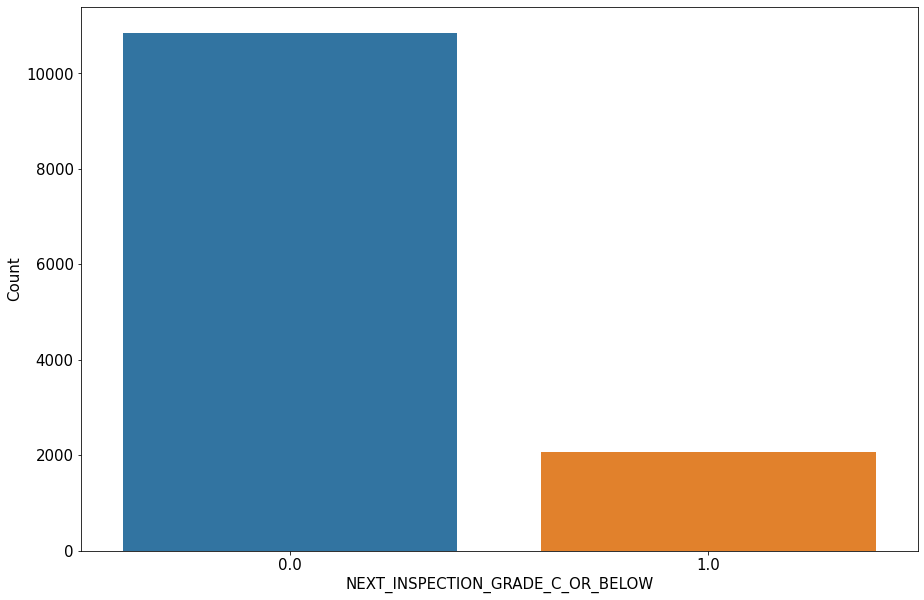

In [125]:
# explore the 'NEXT_INSPECTION_GRADE_C_OR_BELOW' column 
NEXT_INSPECTION_GRADE_C_OR_BELOW_dims = [15,10]
fig, ax = plt.subplots(figsize = NEXT_INSPECTION_GRADE_C_OR_BELOW_dims)
a = sns.countplot(ax = ax, data = train_set, x = 'NEXT_INSPECTION_GRADE_C_OR_BELOW', order =train_set['NEXT_INSPECTION_GRADE_C_OR_BELOW'].value_counts().index)
a.set_xlabel('NEXT_INSPECTION_GRADE_C_OR_BELOW', fontsize=15)
a.set_ylabel('Count', fontsize=15)
a.tick_params(labelsize=15)

In [126]:
# based on the number of RESTAURANT_CATEGORY, we choose the categories over 100
train_set['RESTAURANT_CATEGORY'].value_counts()

Restaurant                     7728
Bar / Tavern                   1989
Snack Bar                      1084
Special Kitchen                 958
Buffet                          184
Portable Unit                   162
Pantry                          130
Meat/Poultry/Seafood            111
Food Trucks / Mobile Vendor      85
Caterer                          59
Banquet Kitchen                  56
Kitchen Bakery                   52
Garde Manger                     40
Bakery Sales                     39
Vegetable Prep                   35
Produce Market                   29
Concessions                      26
Institutional Food Service       25
Confection                       24
Grocery Store Sampling           17
Elementary School Kitchen        15
Portable Bar                     14
Banquet Support                  13
Barbeque                         12
Childcare Kitchens               11
Main Kitchen                      8
Farmers Market                    2
Beer Bar                    

In [127]:
test_set['RESTAURANT_CATEGORY'].value_counts()

Restaurant                     4563
Bar / Tavern                   1088
Snack Bar                       640
Special Kitchen                 545
Buffet                           96
Portable Unit                    93
Pantry                           76
Meat/Poultry/Seafood             74
Food Trucks / Mobile Vendor      47
Kitchen Bakery                   43
Caterer                          36
Banquet Kitchen                  31
Garde Manger                     26
Vegetable Prep                   22
Institutional Food Service       21
Elementary School Kitchen        19
Bakery Sales                     14
Confection                       12
Portable Bar                     11
Concessions                      10
Banquet Support                   8
Produce Market                    7
Grocery Store Sampling            5
Beer Bar                          5
Barbeque                          4
Childcare Kitchens                3
Farmers Market                    3
Main Kitchen                

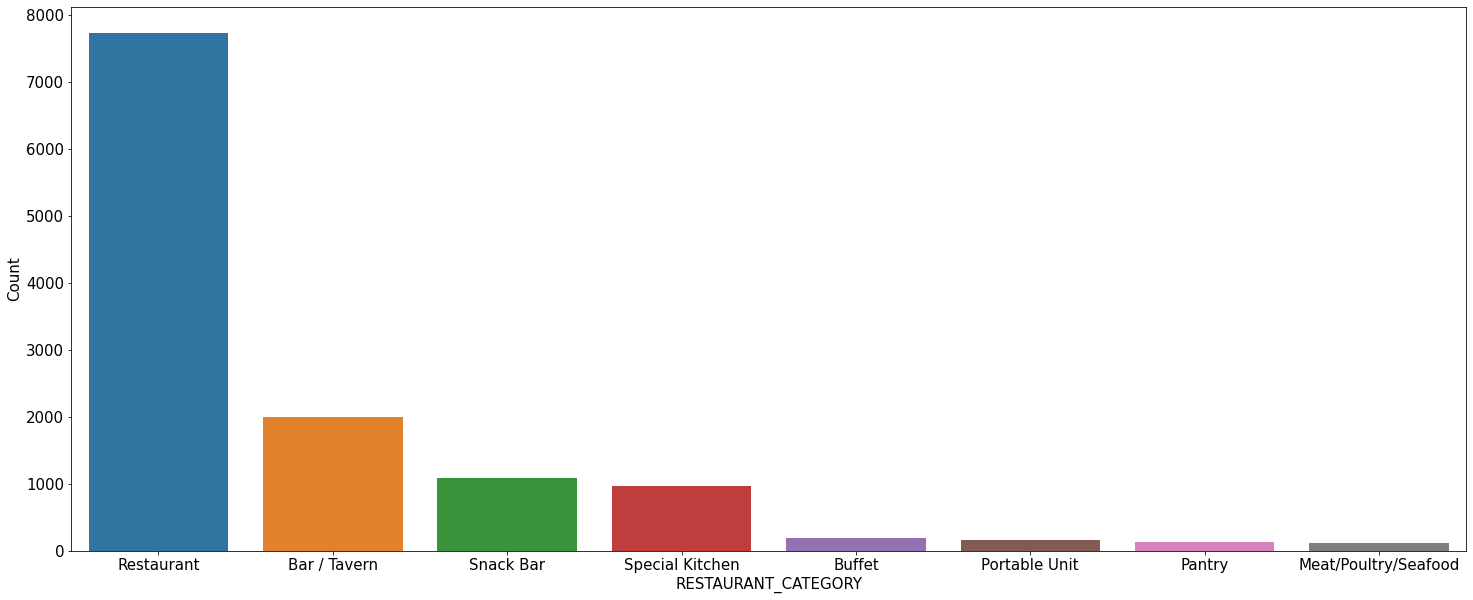

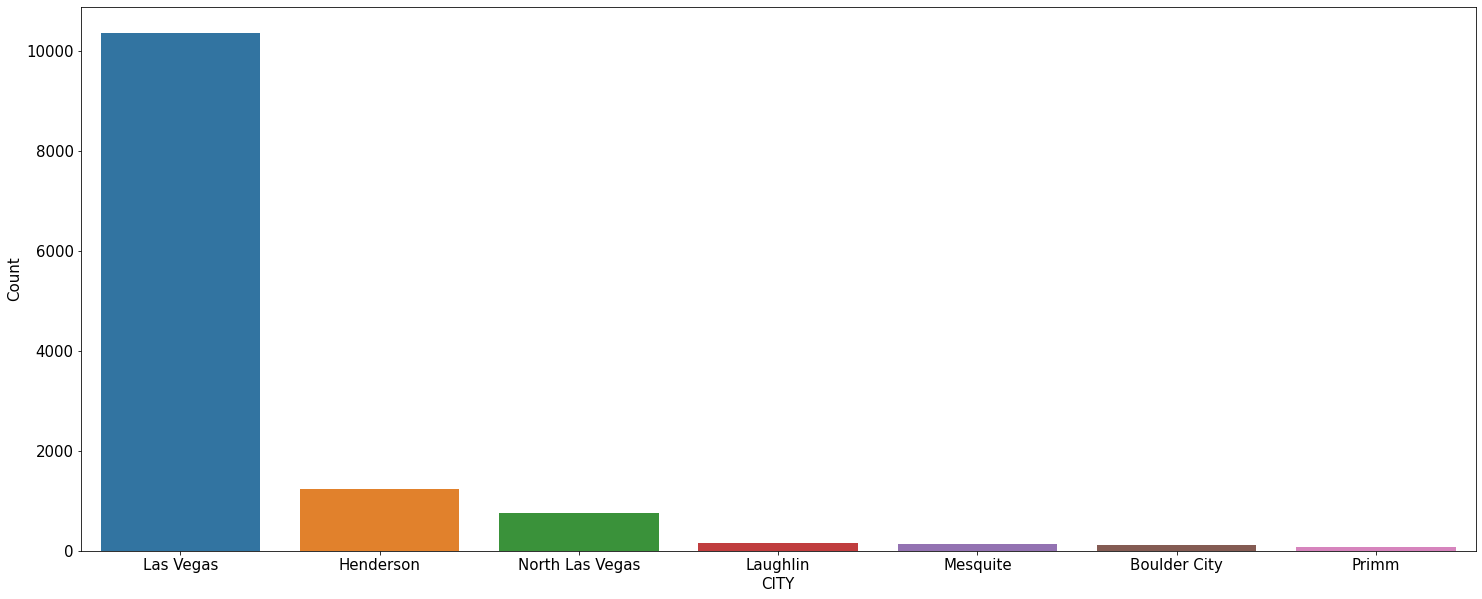

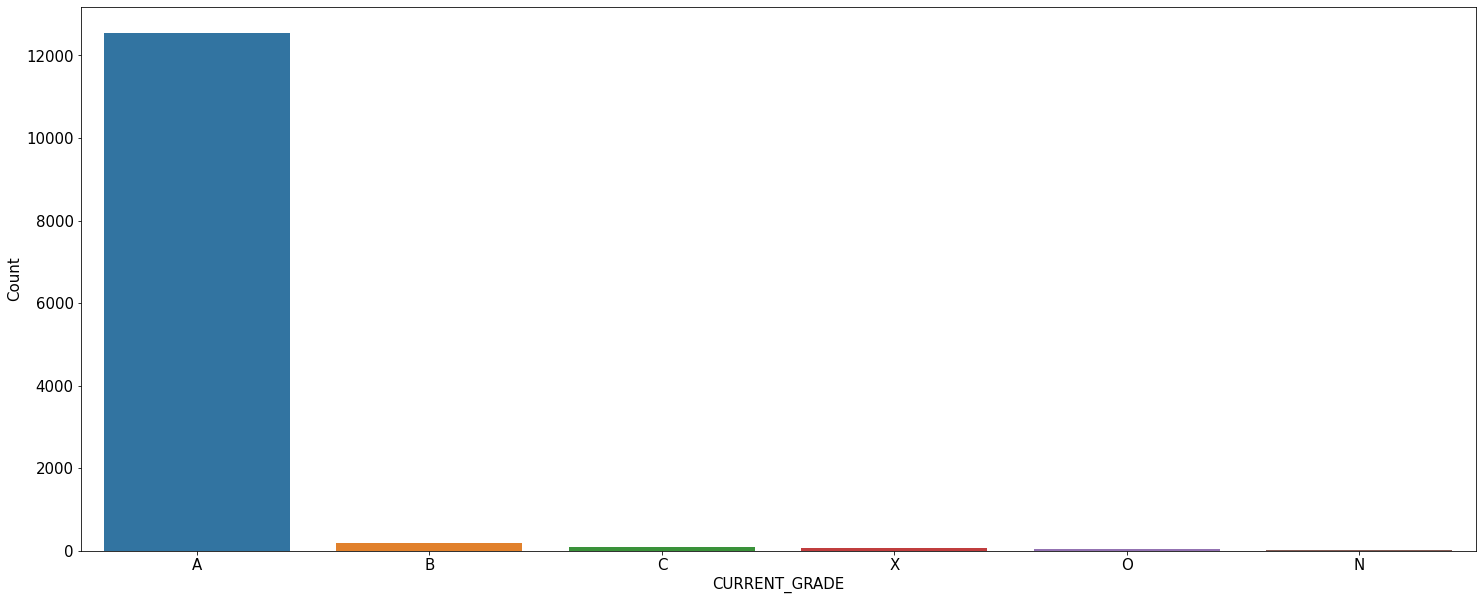

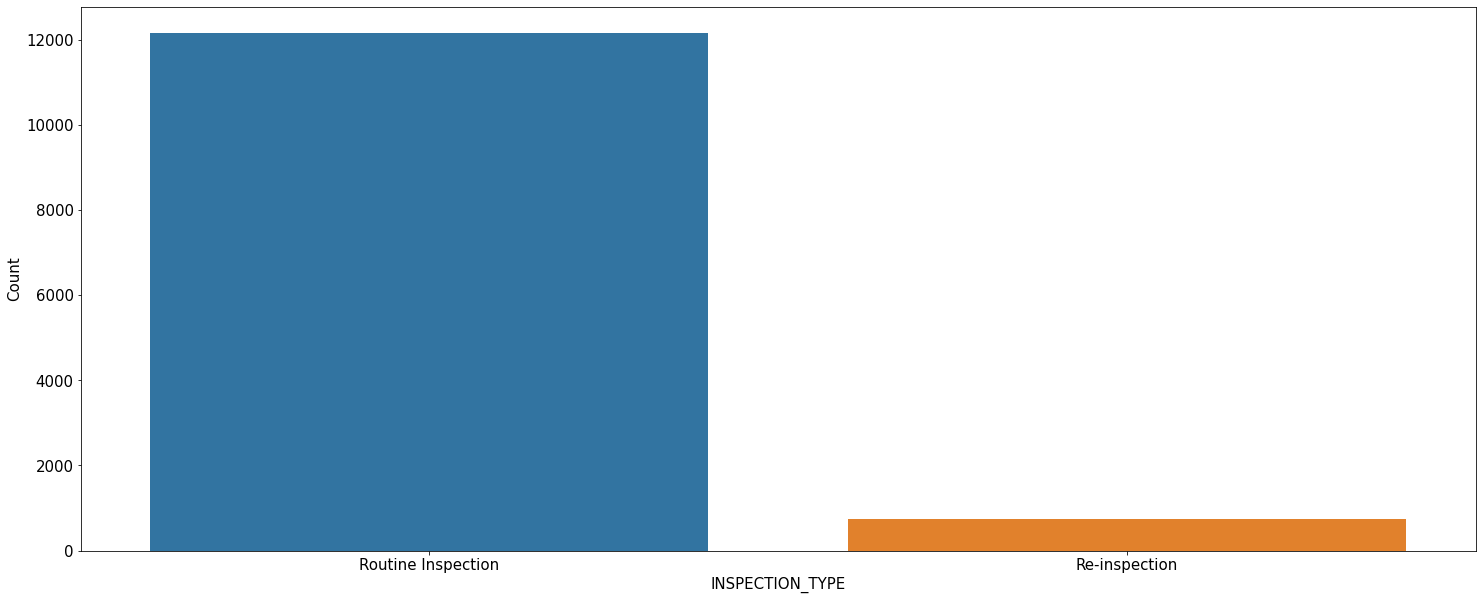

In [128]:
# choose the # of RESTAURANT_CATEGORY greater thant 100
RESTAURANT_CATEGORY_dims = [25,10]
fig, ax = plt.subplots(figsize = RESTAURANT_CATEGORY_dims)
a = sns.countplot(ax = ax, data = train_set, x = 'RESTAURANT_CATEGORY', order =train_set['RESTAURANT_CATEGORY'].value_counts().iloc[:8].index)
a.set_xlabel('RESTAURANT_CATEGORY', fontsize=15)
a.set_ylabel('Count', fontsize=15)
a.tick_params(labelsize=15)
# choose the # of city greater than 100 
CITY_dims = [25,10]
fig, ax = plt.subplots(figsize = CITY_dims)
b = sns.countplot(ax = ax, data = train_set, x = 'CITY', order =train_set['CITY'].value_counts().iloc[:7].index)
b.set_xlabel('CITY', fontsize=15)
b.set_ylabel('Count', fontsize=15)
b.tick_params(labelsize=15)
# choose the # of grade greater than 100 
GRADE_dims = [25,10]
fig, ax = plt.subplots(figsize = GRADE_dims)
c = sns.countplot(ax = ax, data = train_set, x = 'CURRENT_GRADE', order =train_set['CURRENT_GRADE'].value_counts().index)
c.set_xlabel('CURRENT_GRADE', fontsize=15)
c.set_ylabel('Count', fontsize=15)
c.tick_params(labelsize=15)
# inspection type 
insepction_dims = [25,10]
fig, ax = plt.subplots(figsize = insepction_dims)
d = sns.countplot(ax = ax, data = train_set, x = 'INSPECTION_TYPE', order =train_set['INSPECTION_TYPE'].value_counts().index)
d.set_xlabel('INSPECTION_TYPE', fontsize=15)
d.set_ylabel('Count', fontsize=15)
d.tick_params(labelsize=15)


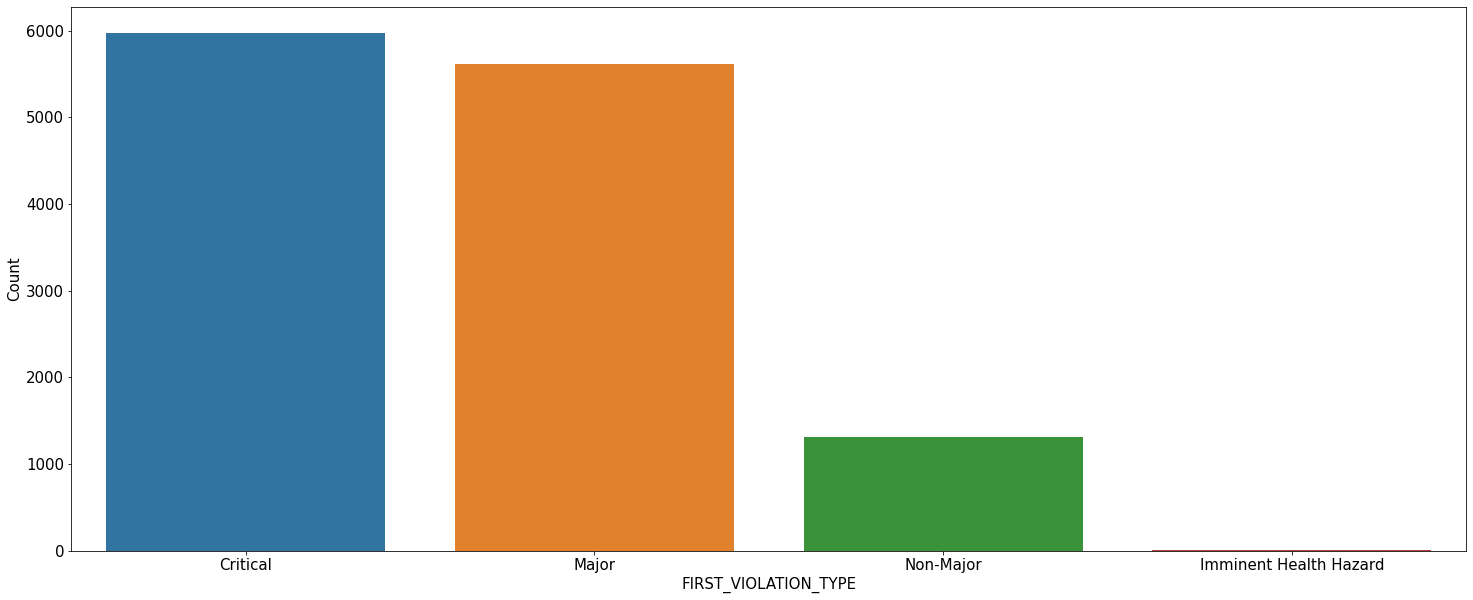

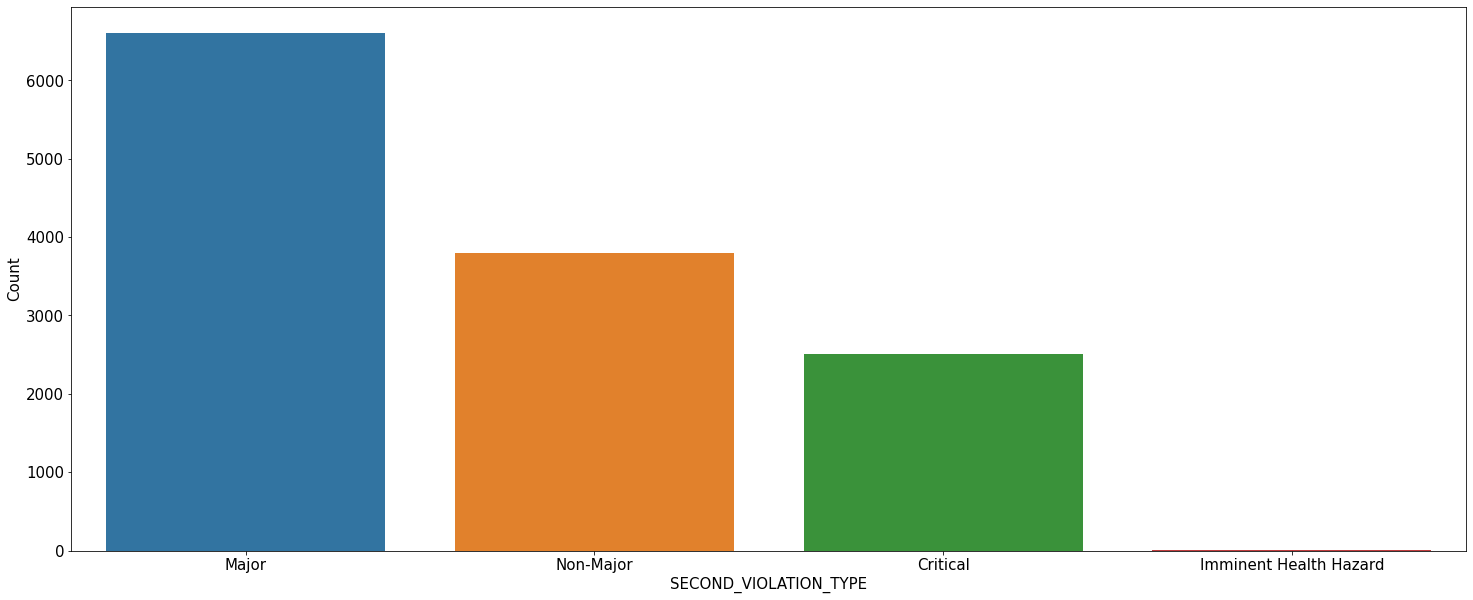

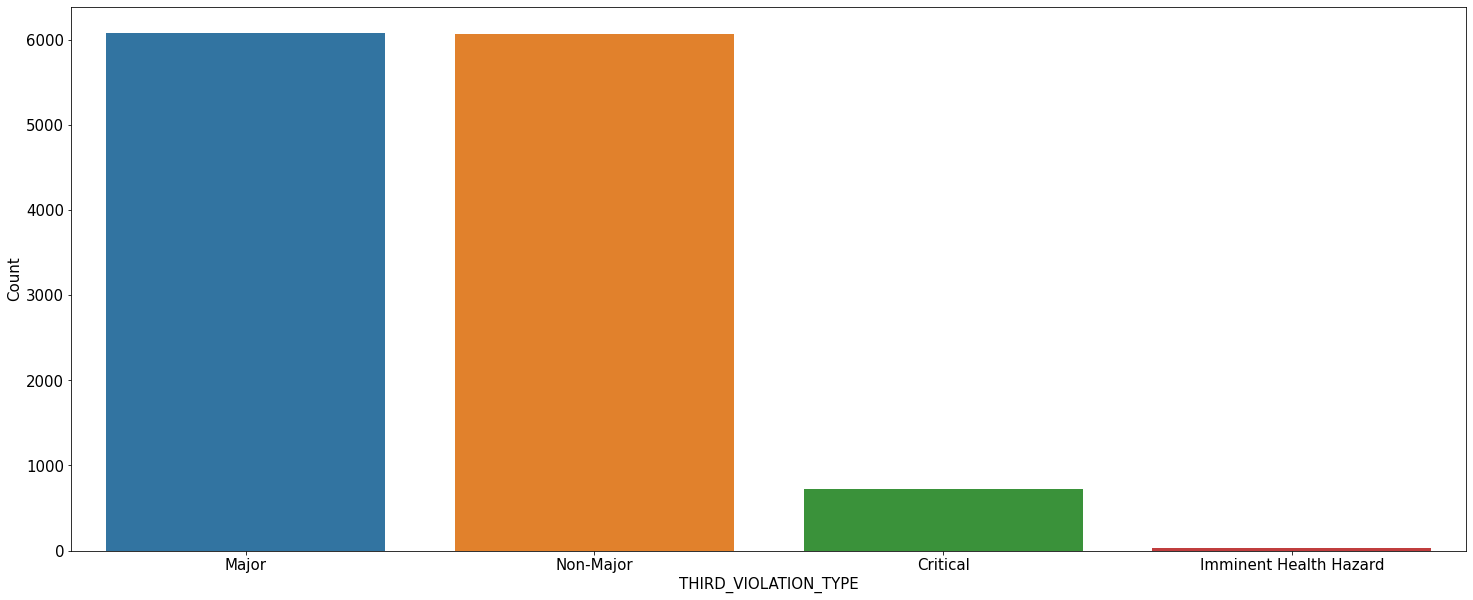

In [129]:
# FIRST_VIOLATION_TYPE
first_violation_dims = [25,10]
fig, ax = plt.subplots(figsize = first_violation_dims)
e = sns.countplot(ax = ax, data = train_set, x = 'FIRST_VIOLATION_TYPE', order =train_set['FIRST_VIOLATION_TYPE'].value_counts().index)
e.set_xlabel('FIRST_VIOLATION_TYPE', fontsize=15)
e.set_ylabel('Count', fontsize=15)
e.tick_params(labelsize=15)
# SECOND_VIOLATION_TYPE
second_violation_dims = [25,10]
fig, ax = plt.subplots(figsize = second_violation_dims)
f = sns.countplot(ax = ax, data = train_set, x = 'SECOND_VIOLATION_TYPE', order =train_set['SECOND_VIOLATION_TYPE'].value_counts().index)
f.set_xlabel('SECOND_VIOLATION_TYPE', fontsize=15)
f.set_ylabel('Count', fontsize=15)
f.tick_params(labelsize=15)
# THIRD_VIOLATION_TYPE
third_violation_dims = [25,10]
fig, ax = plt.subplots(figsize = third_violation_dims)
g = sns.countplot(ax = ax, data = train_set, x = 'THIRD_VIOLATION_TYPE', order =train_set['THIRD_VIOLATION_TYPE'].value_counts().index)
g.set_xlabel('THIRD_VIOLATION_TYPE', fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.tick_params(labelsize=15)

In [130]:
# Categroze the categorical values 
remain_column_category = ["Restaurant", "Bar / Tavern", "Snack Bar", "Special Kitchen", "Buffet", "Portable Unit", "Pantry", "Meat/Poultry/Seafood"]
remain_column_city = ["Las Vegas", "Henderson", "North Las Vegas", "Laughlin", "Mesquite", "Boulder City", "Primm"]
remain_column_grade = ["A", "B", "C"]
remain_column_type = ['Routine Inspection', 'Re-inspection']
categorical_to_numerical = {"RESTAURANT_CATEGORY": {
    "Restaurant": 1,
    "Bar / Tavern": 2,
    "Snack Bar": 3,
    "Special Kitchen": 4,
    "Buffet": 5,
    "Portable Unit": 6,
    "Pantry": 7,
    "Meat/Poultry/Seafood": 8
    },
    "CITY": {
    "Las Vegas": 1,
    "Henderson": 2,
    "North Las Vegas": 3,
    "Laughlin": 4,
    "Mesquite": 5,
    "Boulder City": 6,
    "Primm": 7
    },
    "CURRENT_GRADE": {
    "A": 1,
    "B": 2,
    "C": 3
    },
    "INSPECTION_TYPE": {
    "Routine Inspection": 1,
    "Re-inspection": 2
    },
    "FIRST_VIOLATION_TYPE": {
    "Critical": 1,
    "Major": 2,
    "Non-Major": 3,
    "Imminent Health Hazard": 4
    },
    "SECOND_VIOLATION_TYPE":{
    "Critical": 1,
    "Major": 2,
    "Non-Major": 3,
    "Imminent Health Hazard": 4
    },
    "THIRD_VIOLATION_TYPE":{
    "Critical": 1,
    "Major": 2,
    "Non-Major": 3,
    "Imminent Health Hazard": 4    
    }
                            
}

In [131]:
# replace other category with 0
train_set['RESTAURANT_CATEGORY'] = np.where(train_set['RESTAURANT_CATEGORY'].isin(remain_column_category), train_set['RESTAURANT_CATEGORY'], 5)
train_set['CITY'] = np.where(train_set['CITY'].isin(remain_column_city), train_set['CITY'], 2)
train_set['CURRENT_GRADE'] = np.where(train_set['CURRENT_GRADE'].isin(remain_column_grade), train_set['CURRENT_GRADE'], 2)

test_set['RESTAURANT_CATEGORY'] = np.where(test_set['RESTAURANT_CATEGORY'].isin(remain_column_category), test_set['RESTAURANT_CATEGORY'], 5)
test_set['CITY'] = np.where(test_set['CITY'].isin(remain_column_city), test_set['CITY'], 2)
test_set['CURRENT_GRADE'] = np.where(test_set['CURRENT_GRADE'].isin(remain_column_grade), test_set['CURRENT_GRADE'], 2)
test_set['INSPECTION_TYPE'] = np.where(test_set['INSPECTION_TYPE'].isin(remain_column_type), test_set['INSPECTION_TYPE'], 3)
# fill NaN with -1
#train_set['RESTAURANT_CATEGORY'].fillna(-1, inplace=True)
#train_set['CITY'].fillna(-1, inplace=True)
#train_set['CURRENT_GRADE'].fillna(-1, inplace=True)
#train_set['INSPECTION_TYPE'].fillna(-1, inplace=True)
#train_set['FIRST_VIOLATION_TYPE'].fillna(-1, inplace=True)
#train_set['SECOND_VIOLATION_TYPE'].fillna(-1, inplace=True)
#train_set['THIRD_VIOLATION_TYPE'].fillna(-1, inplace=True)
# convert categorical values to numerical values 
train_set.replace(categorical_to_numerical, inplace=True)
test_set.replace(categorical_to_numerical, inplace=True)

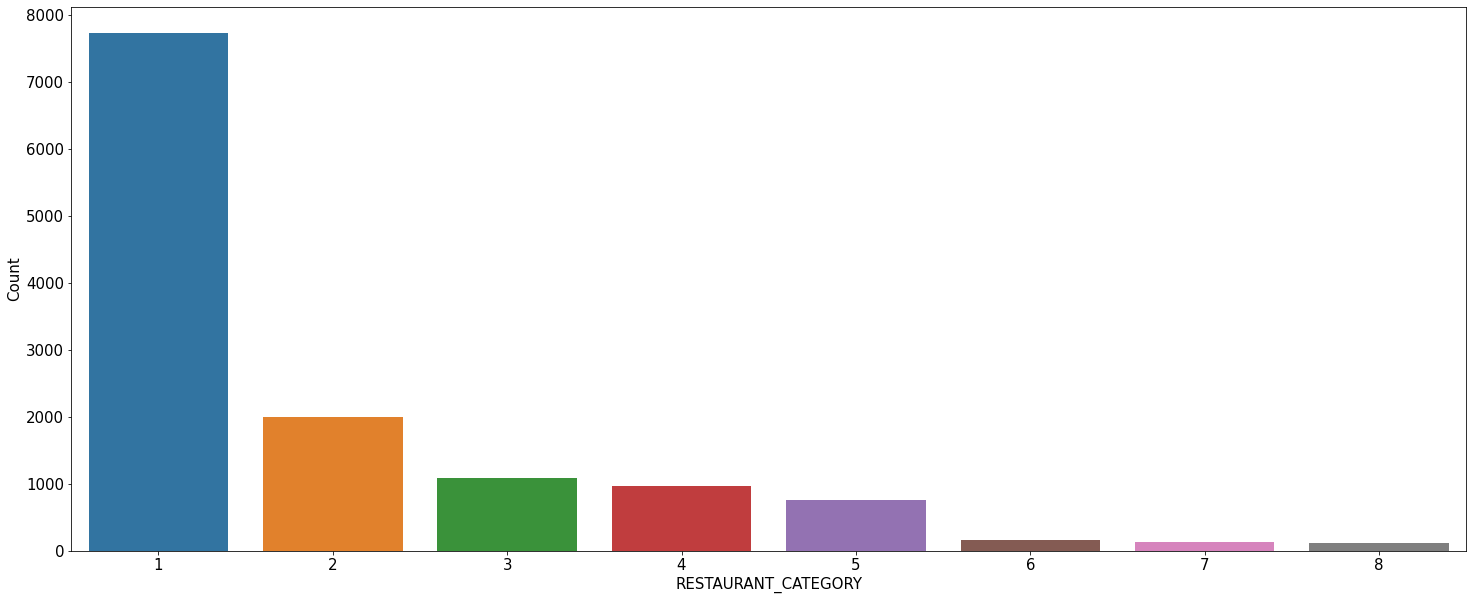

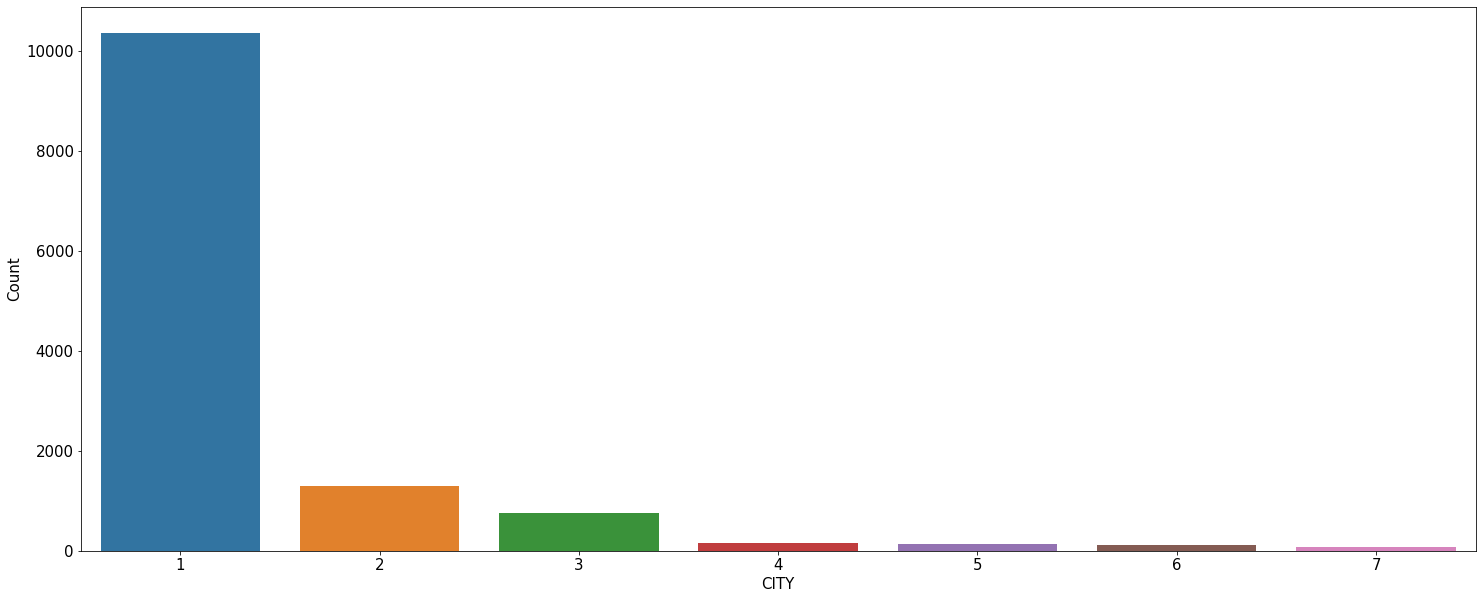

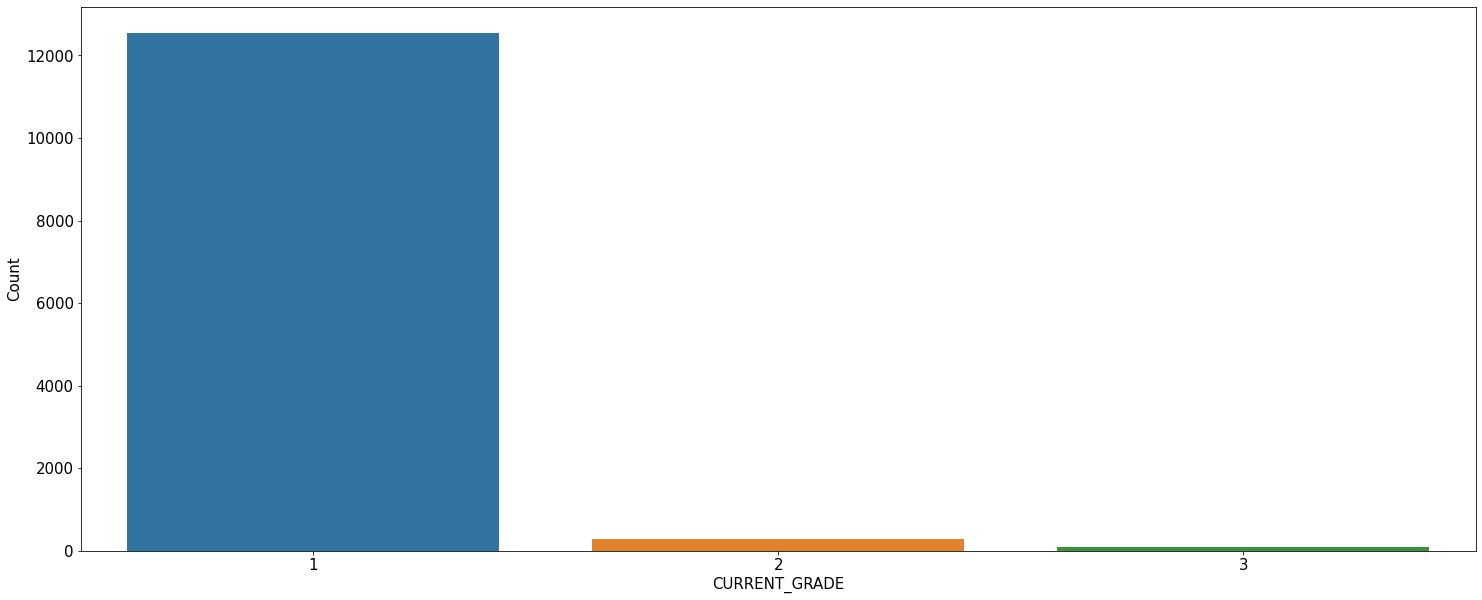

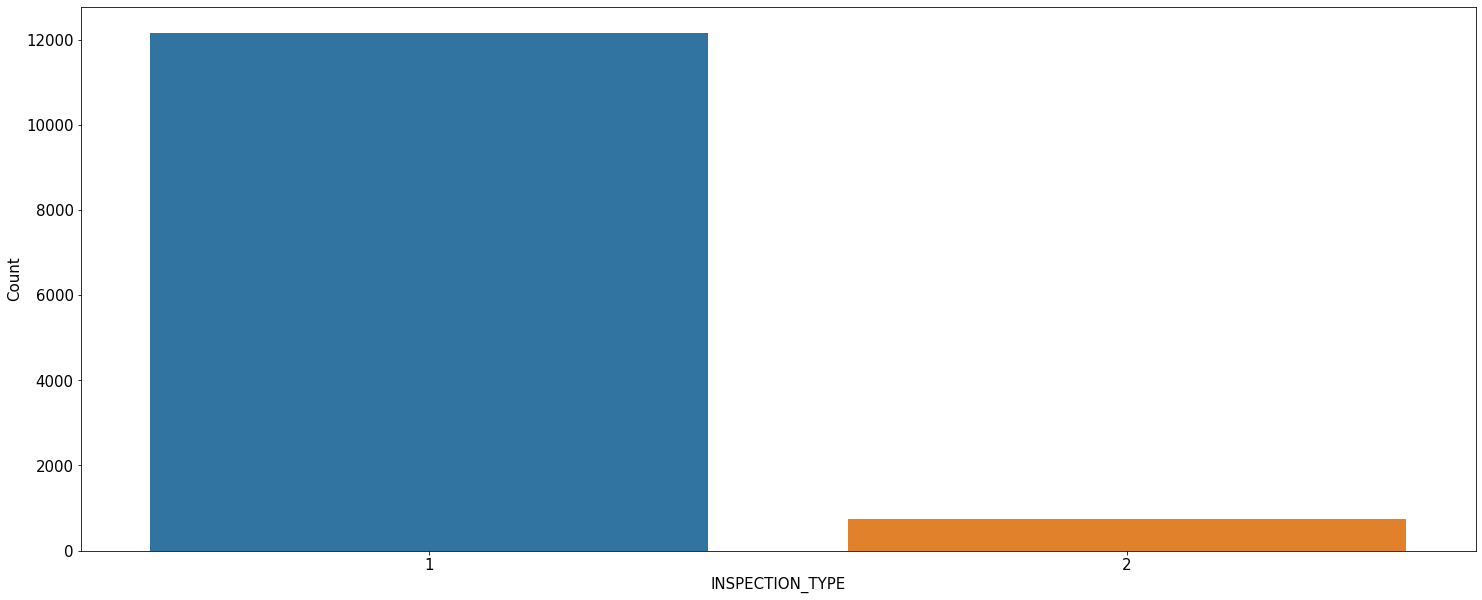

In [132]:
# choose the # of RESTAURANT_CATEGORY greater thant 100
RESTAURANT_CATEGORY_dims = [25,10]
fig, ax = plt.subplots(figsize = RESTAURANT_CATEGORY_dims)
a = sns.countplot(ax = ax, data = train_set, x = 'RESTAURANT_CATEGORY', order =train_set['RESTAURANT_CATEGORY'].value_counts().iloc[:8].index)
a.set_xlabel('RESTAURANT_CATEGORY', fontsize=15)
a.set_ylabel('Count', fontsize=15)
a.tick_params(labelsize=15)
# choose the # of city greater than 100 
CITY_dims = [25,10]
fig, ax = plt.subplots(figsize = CITY_dims)
b = sns.countplot(ax = ax, data = train_set, x = 'CITY', order =train_set['CITY'].value_counts().iloc[:7].index)
b.set_xlabel('CITY', fontsize=15)
b.set_ylabel('Count', fontsize=15)
b.tick_params(labelsize=15)
# choose the # of grade greater than 100 
GRADE_dims = [25,10]
fig, ax = plt.subplots(figsize = GRADE_dims)
c = sns.countplot(ax = ax, data = train_set, x = 'CURRENT_GRADE', order =train_set['CURRENT_GRADE'].value_counts().index)
c.set_xlabel('CURRENT_GRADE', fontsize=15)
c.set_ylabel('Count', fontsize=15)
c.tick_params(labelsize=15)
# inspection type 
insepction_dims = [25,10]
fig, ax = plt.subplots(figsize = insepction_dims)
d = sns.countplot(ax = ax, data = train_set, x = 'INSPECTION_TYPE', order =train_set['INSPECTION_TYPE'].value_counts().index)
d.set_xlabel('INSPECTION_TYPE', fontsize=15)
d.set_ylabel('Count', fontsize=15)
d.tick_params(labelsize=15)

In [133]:
train_set['RESTAURANT_CATEGORY'].value_counts()

1    7728
2    1989
3    1084
4     958
5     748
6     162
7     130
8     111
Name: RESTAURANT_CATEGORY, dtype: int64

In [134]:
train_set['CITY'].value_counts()

1    10357
2     1298
3      756
4      165
5      139
6      112
7       83
Name: CITY, dtype: int64

In [135]:
train_set['INSPECTION_TYPE'].value_counts()

1    12166
2      744
Name: INSPECTION_TYPE, dtype: int64

In [136]:
train_set['FIRST_VIOLATION_TYPE'].value_counts()

1    5974
2    5618
3    1315
4       3
Name: FIRST_VIOLATION_TYPE, dtype: int64

In [137]:
train_set['SECOND_VIOLATION_TYPE'].value_counts()

2    6606
3    3791
1    2509
4       4
Name: SECOND_VIOLATION_TYPE, dtype: int64

In [138]:
train_set['THIRD_VIOLATION_TYPE'].value_counts()

2    6081
3    6069
1     726
4      34
Name: THIRD_VIOLATION_TYPE, dtype: int64

In [139]:
#convert zipcode to 5 digit numbers 
train_set['ZIP'] = train_set['ZIP'].astype(str).str[:5]
test_set['ZIP'] = test_set['ZIP'].astype(str).str[:5]

In [140]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12910 entries, 0 to 15672
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_CATEGORY               12910 non-null  int64  
 1   CITY                              12910 non-null  int64  
 2   ZIP                               12910 non-null  object 
 3   CURRENT_DEMERITS                  12910 non-null  float64
 4   CURRENT_GRADE                     12910 non-null  int64  
 5   EMPLOYEE_COUNT                    12910 non-null  float64
 6   MEDIAN_EMPLOYEE_AGE               12910 non-null  float64
 7   MEDIAN_EMPLOYEE_TENURE            12910 non-null  float64
 8   INSPECTION_TYPE                   12910 non-null  int64  
 9   INSPECTION_DEMERITS               12910 non-null  float64
 10  FIRST_VIOLATION                   12910 non-null  float64
 11  SECOND_VIOLATION                  12910 non-null  float64
 12  THIR

# Pivoting Features

In [141]:
# restaurant_category 
train_set[['RESTAURANT_CATEGORY', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['RESTAURANT_CATEGORY'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

,RESTAURANT_CATEGORY,NEXT_INSPECTION_GRADE_C_OR_BELOW
5,6,0.209877
0,1,0.178054
7,8,0.171171
6,7,0.153846
3,4,0.141962
2,3,0.135609
4,5,0.131016
1,2,0.116642


In [142]:
# City
train_set[['CITY', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['CITY'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

,CITY,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,1,0.164430
6,7,0.156627
2,3,0.148148
1,2,0.145609
5,6,0.116071
4,5,0.115108
3,4,0.096970


In [143]:
'''# INSPECTION_TYPE
train_set[['INSPECTION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['INSPECTION_TYPE'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)'''

"# INSPECTION_TYPE\ntrain_set[['INSPECTION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['INSPECTION_TYPE'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)"

In [144]:
# FIRST_VIOLATION_TYPE
train_set[['FIRST_VIOLATION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['FIRST_VIOLATION_TYPE'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

,FIRST_VIOLATION_TYPE,NEXT_INSPECTION_GRADE_C_OR_BELOW
3,4,0.666667
0,1,0.172246
1,2,0.150053
2,3,0.142966


In [145]:
# SECOND_VIOLATION_TYPE
train_set[['SECOND_VIOLATION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['SECOND_VIOLATION_TYPE'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

,SECOND_VIOLATION_TYPE,NEXT_INSPECTION_GRADE_C_OR_BELOW
3,4,0.500000
0,1,0.203268
2,3,0.149565
1,2,0.148804


In [146]:
# THIRD_VIOLATION_TYPE
train_set[['THIRD_VIOLATION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['THIRD_VIOLATION_TYPE'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

,THIRD_VIOLATION_TYPE,NEXT_INSPECTION_GRADE_C_OR_BELOW
3,4,0.235294
0,1,0.209366
1,2,0.167571
2,3,0.145493


In [147]:
remaining_columns = []
train_set['NUMBER_OF_VIOLATIONS'] = np.where(train_set['NUMBER_OF_VIOLATIONS'].isin(['3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0']), train_set['NUMBER_OF_VIOLATIONS'], '16.0')
test_set['NUMBER_OF_VIOLATIONS'] = np.where(test_set['NUMBER_OF_VIOLATIONS'].isin(['3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0']), test_set['NUMBER_OF_VIOLATIONS'], '16.0')

In [148]:
train_set['NUMBER_OF_VIOLATIONS'].value_counts()

3.0     3088
4.0     2920
5.0     1693
6.0     1427
7.0      992
8.0      830
9.0      545
10.0     409
11.0     275
12.0     230
13.0     158
16.0     150
14.0     112
15.0      81
Name: NUMBER_OF_VIOLATIONS, dtype: int64

In [149]:
# NUMBER_OF_VIOLATIONS
train_set[['NUMBER_OF_VIOLATIONS', 'NEXT_INSPECTION_GRADE_C_OR_BELOW']].groupby(['NUMBER_OF_VIOLATIONS'], as_index=False).mean().sort_values(by='NEXT_INSPECTION_GRADE_C_OR_BELOW', ascending=False)

,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
3,13.0,0.303797
6,16.0,0.260000
4,14.0,0.232143
2,12.0,0.230435
0,10.0,0.217604
5,15.0,0.209877
12,8.0,0.201205
1,11.0,0.178182
13,9.0,0.165138
11,7.0,0.160282


In [150]:
train_set['EMPLOYEE_COUNT'] = np.where(train_set['EMPLOYEE_COUNT'].isin(['3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0', '16.0','17.0','18.0','19.0','20.0','21.0','22.0', '23.0','24.0','25.0','26.0', '27.0','28.0','29.0','30.0','31.0','32.0','33.0','34.0','35.0']), train_set['EMPLOYEE_COUNT'], '36.0')
test_set['EMPLOYEE_COUNT'] = np.where(test_set['EMPLOYEE_COUNT'].isin(['3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0', '16.0','17.0','18.0','19.0','20.0','21.0','22.0', '23.0','24.0','25.0','26.0', '27.0','28.0','29.0','30.0','31.0','32.0','33.0','34.0','35.0']), test_set['EMPLOYEE_COUNT'], '36.0')

# Vitualize features 

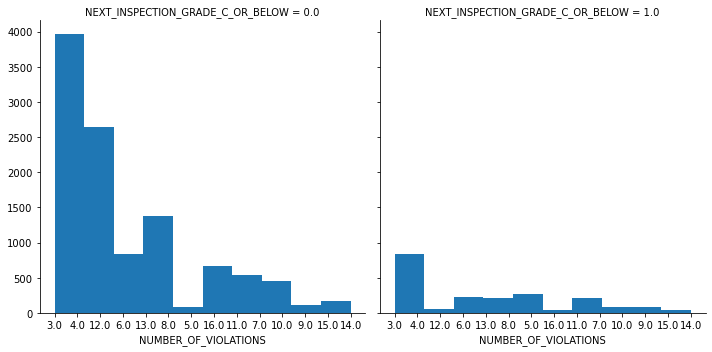

In [151]:
# number of violations 
g = sns.FacetGrid(train_set, col='NEXT_INSPECTION_GRADE_C_OR_BELOW', height=5, aspect=1)
g.map(plt.hist, 'NUMBER_OF_VIOLATIONS', bins=10)

In [152]:
# MEDIAN_EMPLOYEE_AGE
#g = sns.FacetGrid(train_set, col='NEXT_INSPECTION_GRADE_C_OR_BELOW', height=5, aspect=1)
#g.map(plt.hist, 'MEDIAN_EMPLOYEE_AGE', bins=20)

In [153]:
# MEDIAN_EMPLOYEE_TENURE
#g = sns.FacetGrid(train_set, col='NEXT_INSPECTION_GRADE_C_OR_BELOW', height=5, aspect=1)
#g.map(plt.hist, 'MEDIAN_EMPLOYEE_TENURE', bins=20)

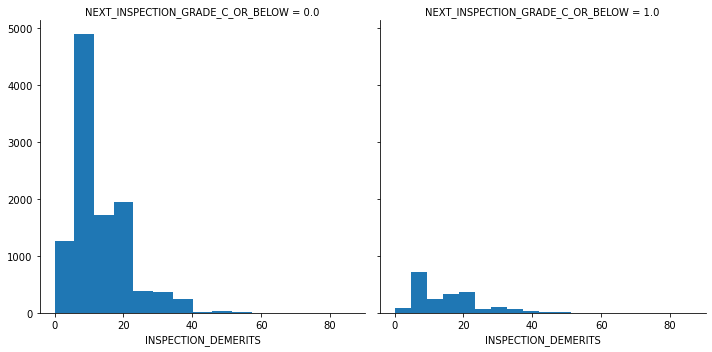

In [154]:
# INSPECTION_DEMERITS
g = sns.FacetGrid(train_set, col='NEXT_INSPECTION_GRADE_C_OR_BELOW', height=5, aspect=1)
g.map(plt.hist, 'INSPECTION_DEMERITS', bins=15)

In [155]:
train_set.head()

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,3,1,89169,0.0,1,25.0,27.959983,13.004886,1,11.0,204.0,215.0,302.0,1,2,4,4.0,0.0
1,1,1,89108,3.0,1,7.0,27.719365,3.922086,1,9.0,214.0,216.0,229.0,2,2,3,5.0,0.0
2,1,1,89130,8.0,1,23.0,26.442637,10.312777,1,9.0,202.0,215.0,233.0,1,2,3,3.0,1.0
3,5,1,89101,0.0,1,14.0,33.988293,4.163975,1,5.0,214.0,230.0,233.0,2,3,3,3.0,0.0
5,2,1,89103,3.0,1,36.0,25.947206,3.839934,1,17.0,206.0,211.0,215.0,1,2,2,7.0,0.0


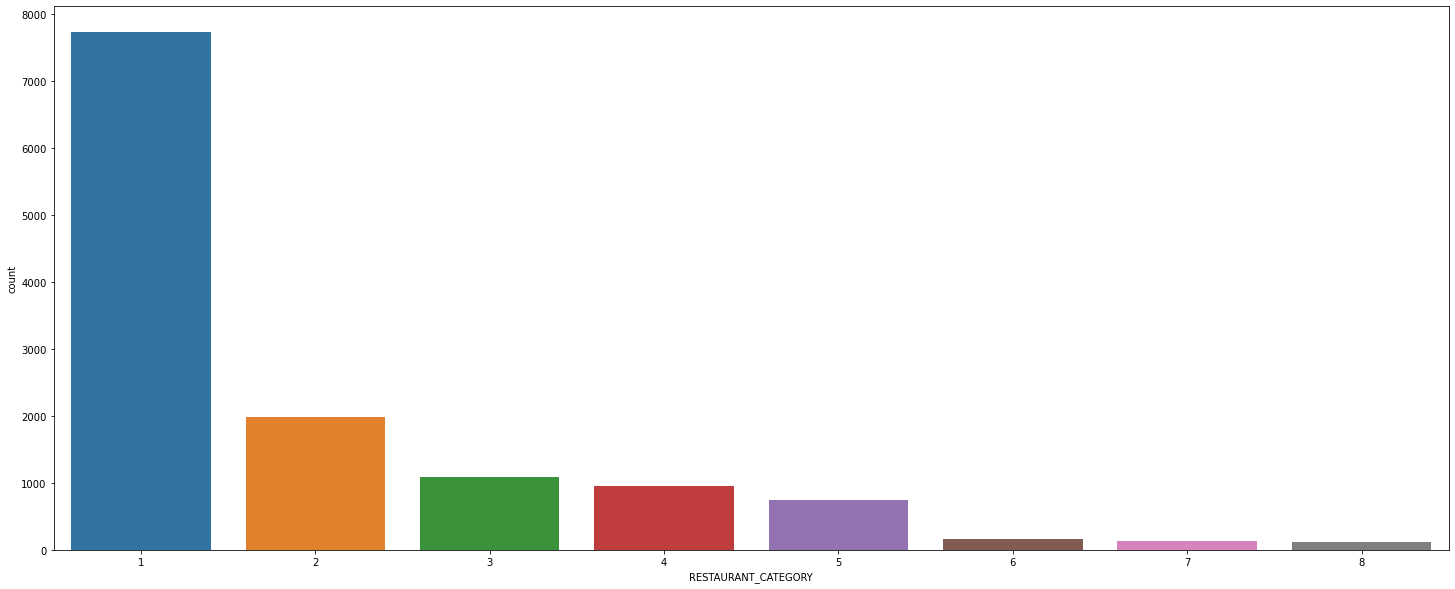

In [156]:
RESTAURANT_CATEGORY_dims = [25,10]
fig, ax = plt.subplots(figsize = RESTAURANT_CATEGORY_dims)
sns.countplot(ax = ax, data = train_set, x = 'RESTAURANT_CATEGORY', order =train_set['RESTAURANT_CATEGORY'].value_counts().iloc[:8].index)

In [157]:
test_set

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE
0,DA1050454,4,1,89158,6,1,1,21,209,213,217,1,2,2,16.0,3.0,31.141933,3.542119
1,DA0986444,2,1,89101,0,1,1,8,214,222,227,2,2,3,16.0,36.0,26.839893,4.885881
2,DA1284914,2,2,89101,8,1,1,15,211,212,213,2,2,2,16.0,36.0,31.202256,1.883055
3,DA1281903,1,1,89146,0,1,2,33,202,206,209,1,1,1,16.0,36.0,36.656000,6.761476
4,DA1004708,1,1,89134,9,1,1,10,213,214,226,2,2,3,16.0,36.0,21.001225,6.601620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,DA0922689,1,1,89106,0,1,1,20,202,214,215,1,2,2,16.0,36.0,33.780673,4.008016
7501,DA1031095,1,1,89183,6,1,2,5,214,229,233,2,3,3,16.0,36.0,31.688779,3.453527
7502,DA0633450,6,3,89144,8,1,1,13,13,28,113,2,3,2,16.0,36.0,26.272563,3.070719
7503,DA0998980,2,1,89109,3,1,1,8,212,214,231,2,2,3,16.0,36.0,19.612605,6.637496


In [158]:
train_set = train_set.astype(float)
test_set_lable = test_set['RESTAURANT_SERIAL_NUMBER']
test_set = test_set.drop(columns=['RESTAURANT_SERIAL_NUMBER'])
test_set = test_set.astype(float)
test_set['RESTAURANT_SERIAL_NUMBER'] = test_set_lable

In [159]:
test_set

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,RESTAURANT_SERIAL_NUMBER
0,4.0,1.0,89158.0,6.0,1.0,1.0,21.0,209.0,213.0,217.0,1.0,2.0,2.0,16.0,3.0,31.141933,3.542119,DA1050454
1,2.0,1.0,89101.0,0.0,1.0,1.0,8.0,214.0,222.0,227.0,2.0,2.0,3.0,16.0,36.0,26.839893,4.885881,DA0986444
2,2.0,2.0,89101.0,8.0,1.0,1.0,15.0,211.0,212.0,213.0,2.0,2.0,2.0,16.0,36.0,31.202256,1.883055,DA1284914
3,1.0,1.0,89146.0,0.0,1.0,2.0,33.0,202.0,206.0,209.0,1.0,1.0,1.0,16.0,36.0,36.656000,6.761476,DA1281903
4,1.0,1.0,89134.0,9.0,1.0,1.0,10.0,213.0,214.0,226.0,2.0,2.0,3.0,16.0,36.0,21.001225,6.601620,DA1004708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,1.0,1.0,89106.0,0.0,1.0,1.0,20.0,202.0,214.0,215.0,1.0,2.0,2.0,16.0,36.0,33.780673,4.008016,DA0922689
7501,1.0,1.0,89183.0,6.0,1.0,2.0,5.0,214.0,229.0,233.0,2.0,3.0,3.0,16.0,36.0,31.688779,3.453527,DA1031095
7502,6.0,3.0,89144.0,8.0,1.0,1.0,13.0,13.0,28.0,113.0,2.0,3.0,2.0,16.0,36.0,26.272563,3.070719,DA0633450
7503,2.0,1.0,89109.0,3.0,1.0,1.0,8.0,212.0,214.0,231.0,2.0,2.0,3.0,16.0,36.0,19.612605,6.637496,DA0998980


In [160]:
test_set_lable

0       DA1050454
1       DA0986444
2       DA1284914
3       DA1281903
4       DA1004708
          ...    
7500    DA0922689
7501    DA1031095
7502    DA0633450
7503    DA0998980
7504    DA0831126
Name: RESTAURANT_SERIAL_NUMBER, Length: 7505, dtype: object

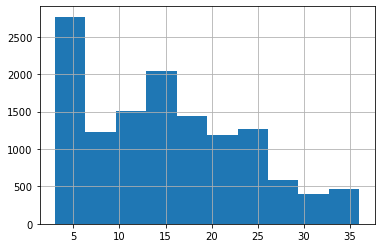

In [161]:
hist = train_set['EMPLOYEE_COUNT'].hist(bins=10)

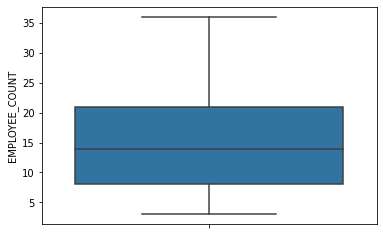

In [162]:
ax = sns.boxplot(y=train_set['EMPLOYEE_COUNT'])

<ipython-input-163-e4a4f8f7d901>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'] <= 10] = 1
<ipython-input-163-e4a4f8f7d901>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'].between(10,20)] = 2
<ipython-input-163-e4a4f8f7d901>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'

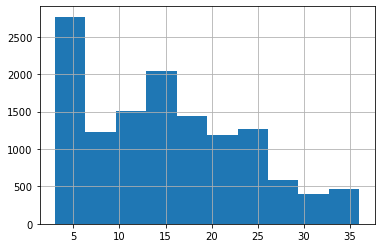

In [163]:
# EMPLOYEE_COUNT
hist = train_set['EMPLOYEE_COUNT'].hist(bins=10)
train_set['EMPLOYEE_COUNT'][train_set['EMPLOYEE_COUNT'] <= 10] = 1 
train_set['EMPLOYEE_COUNT'][train_set['EMPLOYEE_COUNT'].between(10,20)] = 2
train_set['EMPLOYEE_COUNT'][train_set['EMPLOYEE_COUNT'].between(20,30)] = 3
train_set['EMPLOYEE_COUNT'][train_set['EMPLOYEE_COUNT'] > 30] = 4

# _test_EMPLOYEE_COUNT
test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'] <= 10] = 1 
test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'].between(10,20)] = 2
test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'].between(20,30)] = 3
test_set['EMPLOYEE_COUNT'][test_set['EMPLOYEE_COUNT'] > 30] = 4

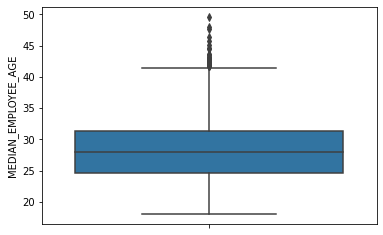

In [164]:
ax = sns.boxplot(y=train_set['MEDIAN_EMPLOYEE_AGE'])

<ipython-input-165-459d8c102fd9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MEDIAN_EMPLOYEE_AGE'][test_set['MEDIAN_EMPLOYEE_AGE'] <= 20] = 1
<ipython-input-165-459d8c102fd9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MEDIAN_EMPLOYEE_AGE'][test_set['MEDIAN_EMPLOYEE_AGE'].between(20,30)] = 2
<ipython-input-165-459d8c102fd9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MEDIAN_EMPLOYEE_AGE']

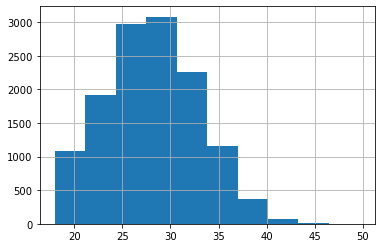

In [165]:
# MEDIAN_EMPLOYEE_AGE
hist = train_set['MEDIAN_EMPLOYEE_AGE'].hist(bins=10)

#train_set = train_set[(train_set['MEDIAN_EMPLOYEE_AGE'] <= 40)]
train_set['MEDIAN_EMPLOYEE_AGE'][train_set['MEDIAN_EMPLOYEE_AGE'] <= 20] = 1 
train_set['MEDIAN_EMPLOYEE_AGE'][train_set['MEDIAN_EMPLOYEE_AGE'].between(20,30)] = 2
train_set['MEDIAN_EMPLOYEE_AGE'][train_set['MEDIAN_EMPLOYEE_AGE'].between(30,40)] = 3
train_set['MEDIAN_EMPLOYEE_AGE'][train_set['MEDIAN_EMPLOYEE_AGE'] > 40] = 4

# test_MEDIAN_EMPLOYEE_AGE
#train_set = train_set[(train_set['MEDIAN_EMPLOYEE_AGE'] <= 40)]
test_set['MEDIAN_EMPLOYEE_AGE'][test_set['MEDIAN_EMPLOYEE_AGE'] <= 20] = 1 
test_set['MEDIAN_EMPLOYEE_AGE'][test_set['MEDIAN_EMPLOYEE_AGE'].between(20,30)] = 2
test_set['MEDIAN_EMPLOYEE_AGE'][test_set['MEDIAN_EMPLOYEE_AGE'].between(30,40)] = 3
test_set['MEDIAN_EMPLOYEE_AGE'][test_set['MEDIAN_EMPLOYEE_AGE'] > 40] = 4

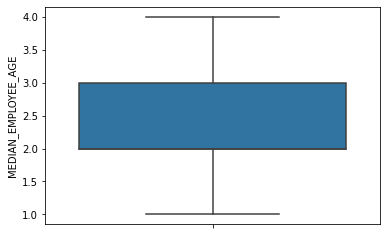

In [166]:
ax = sns.boxplot(y=train_set['MEDIAN_EMPLOYEE_AGE'])

<ipython-input-167-8537a2b51cce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'] <= 2] = 1
<ipython-input-167-8537a2b51cce>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'].between(2,4)] = 2
<ipython-input-167-8537a2b51cce>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MEDIAN_EMPLO

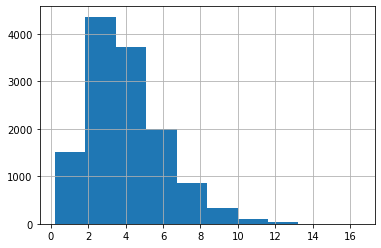

In [167]:
# MEDIAN_EMPLOYEE_TENURE
hist = train_set['MEDIAN_EMPLOYEE_TENURE'].hist(bins=10)
train_set['MEDIAN_EMPLOYEE_TENURE'][train_set['MEDIAN_EMPLOYEE_TENURE'] <= 2] = 1 
train_set['MEDIAN_EMPLOYEE_TENURE'][train_set['MEDIAN_EMPLOYEE_TENURE'].between(2,4)] = 2
train_set['MEDIAN_EMPLOYEE_TENURE'][train_set['MEDIAN_EMPLOYEE_TENURE'].between(4,6)] = 3
train_set['MEDIAN_EMPLOYEE_TENURE'][train_set['MEDIAN_EMPLOYEE_TENURE'].between(6,8)] = 4
train_set['MEDIAN_EMPLOYEE_TENURE'][train_set['MEDIAN_EMPLOYEE_TENURE'].between(8,10)] = 5
train_set['MEDIAN_EMPLOYEE_TENURE'][train_set['MEDIAN_EMPLOYEE_TENURE']>= 10] = 6


# test_MEDIAN_EMPLOYEE_TENURE

test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'] <= 2] = 1 
test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'].between(2,4)] = 2
test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'].between(4,6)] = 3
test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'].between(6,8)] = 4
test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE'].between(8,10)] = 5
test_set['MEDIAN_EMPLOYEE_TENURE'][test_set['MEDIAN_EMPLOYEE_TENURE']>= 10] = 6

<ipython-input-168-ae892512f101>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['FIRST_VIOLATION'][test_set['FIRST_VIOLATION'] <= 125] = 1
<ipython-input-168-ae892512f101>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['FIRST_VIOLATION'][test_set['FIRST_VIOLATION'].between(80,160)] = 2
<ipython-input-168-ae892512f101>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['FIRST_VIOLATION'][test_set['FIRST_VI

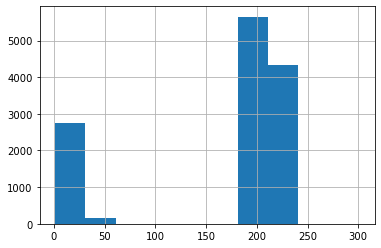

In [168]:
# FIRST_VIOLATION
hist = train_set['FIRST_VIOLATION'].hist(bins=10)
train_set['FIRST_VIOLATION'][train_set['FIRST_VIOLATION'] <= 125] = 1 
train_set['FIRST_VIOLATION'][train_set['FIRST_VIOLATION'].between(80,160)] = 2
train_set['FIRST_VIOLATION'][train_set['FIRST_VIOLATION'].between(160,240)] = 3
train_set['FIRST_VIOLATION'][train_set['FIRST_VIOLATION'] > 240] = 4

# test_FIRST_VIOLATION
test_set['FIRST_VIOLATION'][test_set['FIRST_VIOLATION'] <= 125] = 1 
test_set['FIRST_VIOLATION'][test_set['FIRST_VIOLATION'].between(80,160)] = 2
test_set['FIRST_VIOLATION'][test_set['FIRST_VIOLATION'].between(160,240)] = 3
test_set['FIRST_VIOLATION'][test_set['FIRST_VIOLATION'] > 240] = 4

<ipython-input-169-7ed27df909ba>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'] <= 50] = 1
<ipython-input-169-7ed27df909ba>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'].between(50,100)] = 2
<ipython-input-169-7ed27df909ba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['SECOND_VIOLATION'][test_set['SEC

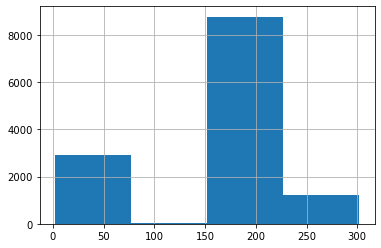

In [169]:
# SECOND_VIOLATION
train_set['SECOND_VIOLATION'].value_counts()
hist = train_set['SECOND_VIOLATION'].hist(bins=4)
train_set['SECOND_VIOLATION'][train_set['SECOND_VIOLATION'] <= 50] = 1 
train_set['SECOND_VIOLATION'][train_set['SECOND_VIOLATION'].between(50,100)] = 2
train_set['SECOND_VIOLATION'][train_set['SECOND_VIOLATION'].between(100,150)] = 3 
train_set['SECOND_VIOLATION'][train_set['SECOND_VIOLATION'].between(150,200)] = 4
train_set['SECOND_VIOLATION'][train_set['SECOND_VIOLATION'].between(200,250)] = 5
train_set['SECOND_VIOLATION'][train_set['SECOND_VIOLATION'] > 250] = 6

# test_SECOND_VIOLATION

test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'] <= 50] = 1 
test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'].between(50,100)] = 2
test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'].between(100,150)] = 3 
test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'].between(150,200)] = 4
test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'].between(200,250)] = 5
test_set['SECOND_VIOLATION'][test_set['SECOND_VIOLATION'] > 250] = 6

<ipython-input-170-92bea138ada5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['THIRD_VIOLATION'][test_set['THIRD_VIOLATION'] <= 75] = 1
<ipython-input-170-92bea138ada5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['THIRD_VIOLATION'][test_set['THIRD_VIOLATION'].between(75,150)] = 2
<ipython-input-170-92bea138ada5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['THIRD_VIOLATION'][test_set['THIRD_VIO

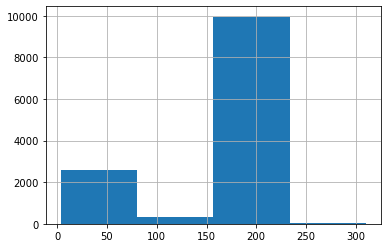

In [170]:
# THIRD_VIOLATION
hist = train_set['THIRD_VIOLATION'].hist(bins=4)
train_set['THIRD_VIOLATION'][train_set['THIRD_VIOLATION'] <= 75] = 1 
train_set['THIRD_VIOLATION'][train_set['THIRD_VIOLATION'].between(75,150)] = 2
train_set['THIRD_VIOLATION'][train_set['THIRD_VIOLATION'].between(150,225)] = 3
train_set['THIRD_VIOLATION'][train_set['THIRD_VIOLATION'] > 225] = 4

# test_THIRD_VIOLATION
test_set['THIRD_VIOLATION'][test_set['THIRD_VIOLATION'] <= 75] = 1 
test_set['THIRD_VIOLATION'][test_set['THIRD_VIOLATION'].between(75,150)] = 2
test_set['THIRD_VIOLATION'][test_set['THIRD_VIOLATION'].between(150,225)] = 3
test_set['THIRD_VIOLATION'][test_set['THIRD_VIOLATION'] > 225] = 4

In [171]:
train_set = train_set[(train_set['CURRENT_DEMERITS'] <= 20)]
'''train_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'] <= 10] = 1 
train_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'].between(10,20)] = 2
train_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'].between(20,30)] = 3
train_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'].between(30,40)] = 4
train_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'] > 40] = 5'''


"train_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'] <= 10] = 1 \ntrain_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'].between(10,20)] = 2\ntrain_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'].between(20,30)] = 3\ntrain_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'].between(30,40)] = 4\ntrain_set['CURRENT_DEMERITS'][train_set['CURRENT_DEMERITS'] > 40] = 5"

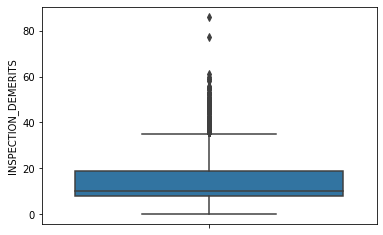

In [172]:
fig, ax = plt.subplots()
ax = sns.boxplot(ax= ax, y=train_set["INSPECTION_DEMERITS"])

In [173]:
train_set_x = train_set.iloc[:, :-1] 
train_set_y = train_set['NEXT_INSPECTION_GRADE_C_OR_BELOW']
from imblearn.over_sampling import ADASYN
train_set_x, train_set_y = ADASYN().fit_sample(train_set_x, train_set_y.ravel())

In [174]:
np.unique(train_set_y,return_counts=True)

(array([0., 1.]), array([10769, 10502]))

In [175]:
# train_set
count_critical = np.zeros(len(train_set_x))
count_major = np.zeros(len(train_set_x))
for i in range(len(train_set)):
    if train_set['FIRST_VIOLATION_TYPE'].iloc[i] == 1.0:
        count_critical[i] += 1
    if train_set['SECOND_VIOLATION_TYPE'].iloc[i] == 1.0:
        count_critical[i] += 1
    if train_set['THIRD_VIOLATION_TYPE'].iloc[i] == 1.0:
        count_critical[i] += 1
for i in range(len(train_set)):
    if train_set['FIRST_VIOLATION_TYPE'].iloc[i] == 2.0:
        count_major[i] += 1
    if train_set['SECOND_VIOLATION_TYPE'].iloc[i] == 2.0:
        count_major[i] += 1
    if train_set['THIRD_VIOLATION_TYPE'].iloc[i] == 2.0:
        count_major[i] += 1

# test_set
test_count_critical = np.zeros(len(test_set))
test_count_major = np.zeros(len(test_set))
for i in range(len(test_set)):
    if test_set['FIRST_VIOLATION_TYPE'].iloc[i] == 1.0:
        test_count_critical[i] += 1
    if test_set['SECOND_VIOLATION_TYPE'].iloc[i] == 1.0:
        test_count_critical[i] += 1
    if test_set['THIRD_VIOLATION_TYPE'].iloc[i] == 1.0:
        test_count_critical[i] += 1
for i in range(len(test_set)):
    if test_set['FIRST_VIOLATION_TYPE'].iloc[i] == 2.0:
        test_count_major[i] += 1
    if test_set['SECOND_VIOLATION_TYPE'].iloc[i] == 2.0:
        test_count_major[i] += 1
    if test_set['THIRD_VIOLATION_TYPE'].iloc[i] == 2.0:
        test_count_major[i] += 1

In [176]:
len(count_critical)

21271

In [177]:
train_set_x['count_critical'] = count_critical
train_set_x['count_major'] = count_major
test_set['count_critical'] = test_count_critical
test_set['count_major'] = test_count_major

In [178]:
train_set_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21271 entries, 0 to 21270
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESTAURANT_CATEGORY     21271 non-null  float64
 1   CITY                    21271 non-null  float64
 2   ZIP                     21271 non-null  float64
 3   CURRENT_DEMERITS        21271 non-null  float64
 4   CURRENT_GRADE           21271 non-null  float64
 5   EMPLOYEE_COUNT          21271 non-null  float64
 6   MEDIAN_EMPLOYEE_AGE     21271 non-null  float64
 7   MEDIAN_EMPLOYEE_TENURE  21271 non-null  float64
 8   INSPECTION_TYPE         21271 non-null  float64
 9   INSPECTION_DEMERITS     21271 non-null  float64
 10  FIRST_VIOLATION         21271 non-null  float64
 11  SECOND_VIOLATION        21271 non-null  float64
 12  THIRD_VIOLATION         21271 non-null  float64
 13  FIRST_VIOLATION_TYPE    21271 non-null  float64
 14  SECOND_VIOLATION_TYPE   21271 non-null

In [179]:
train_set_x.head()

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,count_critical,count_major
0,3.0,1.0,89169.0,0.0,1.0,3.0,2.0,6.0,1.0,11.0,3.0,5.0,4.0,1.0,2.0,4.0,4.0,1.0,1.0
1,1.0,1.0,89108.0,3.0,1.0,1.0,2.0,2.0,1.0,9.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,0.0,2.0
2,1.0,1.0,89130.0,8.0,1.0,3.0,2.0,6.0,1.0,9.0,3.0,5.0,4.0,1.0,2.0,3.0,3.0,1.0,1.0
3,5.0,1.0,89101.0,0.0,1.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,4.0,2.0,3.0,3.0,3.0,0.0,1.0
4,2.0,1.0,89103.0,3.0,1.0,4.0,2.0,2.0,1.0,17.0,3.0,5.0,3.0,1.0,2.0,2.0,7.0,1.0,2.0


In [180]:
'''a = list(train_set_x.columns) 
test_set = test_set.reindex(columns=a)
test_set.info()'''

'a = list(train_set_x.columns) \ntest_set = test_set.reindex(columns=a)\ntest_set.info()'

In [181]:
test_set.head()

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,RESTAURANT_SERIAL_NUMBER,count_critical,count_major
0,4.0,1.0,89158.0,6.0,1.0,1.0,21.0,3.0,5.0,3.0,1.0,2.0,2.0,16.0,1.0,3.0,2.0,DA1050454,1.0,2.0
1,2.0,1.0,89101.0,0.0,1.0,1.0,8.0,3.0,5.0,4.0,2.0,2.0,3.0,16.0,4.0,2.0,3.0,DA0986444,0.0,2.0
2,2.0,2.0,89101.0,8.0,1.0,1.0,15.0,3.0,5.0,3.0,2.0,2.0,2.0,16.0,4.0,3.0,1.0,DA1284914,0.0,3.0
3,1.0,1.0,89146.0,0.0,1.0,2.0,33.0,3.0,5.0,3.0,1.0,1.0,1.0,16.0,4.0,3.0,4.0,DA1281903,3.0,0.0
4,1.0,1.0,89134.0,9.0,1.0,1.0,10.0,3.0,5.0,4.0,2.0,2.0,3.0,16.0,4.0,2.0,4.0,DA1004708,0.0,2.0


In [182]:
test_set_lable = test_set['RESTAURANT_SERIAL_NUMBER']
test_set = test_set.drop(columns=['RESTAURANT_SERIAL_NUMBER'])
test_set = test_set.astype(float)

In [183]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESTAURANT_CATEGORY     7505 non-null   float64
 1   CITY                    7505 non-null   float64
 2   ZIP                     7503 non-null   float64
 3   CURRENT_DEMERITS        7505 non-null   float64
 4   CURRENT_GRADE           7505 non-null   float64
 5   INSPECTION_TYPE         7505 non-null   float64
 6   INSPECTION_DEMERITS     7505 non-null   float64
 7   FIRST_VIOLATION         7505 non-null   float64
 8   SECOND_VIOLATION        7505 non-null   float64
 9   THIRD_VIOLATION         7505 non-null   float64
 10  FIRST_VIOLATION_TYPE    7505 non-null   float64
 11  SECOND_VIOLATION_TYPE   7505 non-null   float64
 12  THIRD_VIOLATION_TYPE    7505 non-null   float64
 13  NUMBER_OF_VIOLATIONS    7505 non-null   float64
 14  EMPLOYEE_COUNT          7505 non-null   

In [184]:
train_set_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21271 entries, 0 to 21270
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESTAURANT_CATEGORY     21271 non-null  float64
 1   CITY                    21271 non-null  float64
 2   ZIP                     21271 non-null  float64
 3   CURRENT_DEMERITS        21271 non-null  float64
 4   CURRENT_GRADE           21271 non-null  float64
 5   EMPLOYEE_COUNT          21271 non-null  float64
 6   MEDIAN_EMPLOYEE_AGE     21271 non-null  float64
 7   MEDIAN_EMPLOYEE_TENURE  21271 non-null  float64
 8   INSPECTION_TYPE         21271 non-null  float64
 9   INSPECTION_DEMERITS     21271 non-null  float64
 10  FIRST_VIOLATION         21271 non-null  float64
 11  SECOND_VIOLATION        21271 non-null  float64
 12  THIRD_VIOLATION         21271 non-null  float64
 13  FIRST_VIOLATION_TYPE    21271 non-null  float64
 14  SECOND_VIOLATION_TYPE   21271 non-null

In [185]:
a = list(train_set_x.columns) 
test_set = test_set.reindex(columns=a)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESTAURANT_CATEGORY     7505 non-null   float64
 1   CITY                    7505 non-null   float64
 2   ZIP                     7503 non-null   float64
 3   CURRENT_DEMERITS        7505 non-null   float64
 4   CURRENT_GRADE           7505 non-null   float64
 5   EMPLOYEE_COUNT          7505 non-null   float64
 6   MEDIAN_EMPLOYEE_AGE     7505 non-null   float64
 7   MEDIAN_EMPLOYEE_TENURE  7505 non-null   float64
 8   INSPECTION_TYPE         7505 non-null   float64
 9   INSPECTION_DEMERITS     7505 non-null   float64
 10  FIRST_VIOLATION         7505 non-null   float64
 11  SECOND_VIOLATION        7505 non-null   float64
 12  THIRD_VIOLATION         7505 non-null   float64
 13  FIRST_VIOLATION_TYPE    7505 non-null   float64
 14  SECOND_VIOLATION_TYPE   7505 non-null   

In [186]:
test_set.head()

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,count_critical,count_major
0,4.0,1.0,89158.0,6.0,1.0,1.0,3.0,2.0,1.0,21.0,3.0,5.0,3.0,1.0,2.0,2.0,16.0,1.0,2.0
1,2.0,1.0,89101.0,0.0,1.0,4.0,2.0,3.0,1.0,8.0,3.0,5.0,4.0,2.0,2.0,3.0,16.0,0.0,2.0
2,2.0,2.0,89101.0,8.0,1.0,4.0,3.0,1.0,1.0,15.0,3.0,5.0,3.0,2.0,2.0,2.0,16.0,0.0,3.0
3,1.0,1.0,89146.0,0.0,1.0,4.0,3.0,4.0,2.0,33.0,3.0,5.0,3.0,1.0,1.0,1.0,16.0,3.0,0.0
4,1.0,1.0,89134.0,9.0,1.0,4.0,2.0,4.0,1.0,10.0,3.0,5.0,4.0,2.0,2.0,3.0,16.0,0.0,2.0


# Modelling 

In [187]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 33)
#train_set_x, train_set_y = sm.fit_sample(train_set_x, train_set_y.ravel())

In [188]:
from sklearn.model_selection import RandomizedSearchCV

In [189]:
X_train, X_test, y_train, y_test = train_test_split(train_set_x, train_set_y, test_size=0.15, random_state=42)

Feature: 0, Score: 0.01536
Feature: 1, Score: 0.00755
Feature: 2, Score: 0.07230
Feature: 3, Score: 0.04206
Feature: 4, Score: 0.00141
Feature: 5, Score: 0.02864
Feature: 6, Score: 0.02838
Feature: 7, Score: 0.03668
Feature: 8, Score: 0.00479
Feature: 9, Score: 0.03978
Feature: 10, Score: 0.00234
Feature: 11, Score: 0.00247
Feature: 12, Score: 0.00664
Feature: 13, Score: 0.09056
Feature: 14, Score: 0.00578
Feature: 15, Score: 0.01138
Feature: 16, Score: 0.03155
Feature: 17, Score: 0.09191
Feature: 18, Score: 0.48041


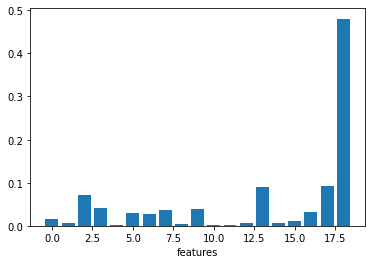

In [190]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('features')
pyplot.show()

In [191]:
'''columns_drop = ['CURRENT_DEMERITS']
X_train = X_train.drop(columns_drop, axis = 1)
X_test = X_test.drop(columns_drop, axis = 1)'''

"columns_drop = ['CURRENT_DEMERITS']\nX_train = X_train.drop(columns_drop, axis = 1)\nX_test = X_test.drop(columns_drop, axis = 1)"

In [192]:
X_train

,RESTAURANT_CATEGORY,CITY,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,count_critical,count_major
3169,2.0,1.0,89124.000000,3.000000,1.0,1.000000,2.000000,4.000000,1.0,7.000000,3.0,5.0,4.0,1.0,3.0,3.0,3.000000,1.0,0.0
4461,3.0,3.0,89084.000000,8.000000,1.0,3.000000,1.000000,3.000000,1.0,16.000000,3.0,5.0,3.0,1.0,1.0,2.0,4.000000,2.0,1.0
15404,1.0,1.0,89146.201599,9.000000,1.0,1.000000,2.100799,2.899201,1.0,19.798401,3.0,5.0,3.0,2.0,2.0,2.0,8.201599,0.0,0.0
1705,1.0,1.0,89121.000000,8.000000,1.0,2.000000,2.000000,2.000000,1.0,20.000000,3.0,5.0,3.0,2.0,2.0,2.0,7.000000,0.0,3.0
10811,1.0,1.0,89102.000000,0.000000,1.0,3.000000,3.000000,1.000000,1.0,16.000000,3.0,5.0,3.0,1.0,1.0,2.0,6.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.0,1.0,89119.000000,6.000000,1.0,1.000000,2.000000,2.000000,1.0,10.000000,1.0,1.0,1.0,2.0,3.0,3.0,5.000000,0.0,1.0
11964,2.0,1.0,89109.000000,0.000000,1.0,2.000000,3.000000,2.000000,1.0,19.000000,3.0,5.0,3.0,1.0,1.0,2.0,5.000000,2.0,1.0
5390,5.0,1.0,89113.000000,8.000000,1.0,2.000000,2.000000,2.000000,1.0,5.000000,3.0,5.0,4.0,2.0,3.0,3.0,3.000000,0.0,1.0
860,1.0,6.0,89005.000000,3.000000,1.0,3.000000,2.000000,3.000000,1.0,9.000000,3.0,5.0,4.0,2.0,2.0,3.0,5.000000,0.0,2.0


In [193]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 19, num = 19)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [194]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.4s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19]},
                   random_state=42, verbose=2)

In [220]:
rf_random.best_params_

{'n_estimators': 19,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [196]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.sum(errors / len(test_labels))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 12, random_state = 42)
base_model.fit(X_train, y_train)
#y_pred=base_model.predict(X_test)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1725 degrees.
Accuracy = 82.75%.


In [197]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.1665 degrees.
Accuracy = 83.35%.


In [198]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.72%.


In [199]:
X_test.shape

(3191, 19)

# LightGBM

In [200]:
'''import lightgbm as lgb
train_set_x = train_set.iloc[:, :-1] 
train_set_y = train_set['NEXT_INSPECTION_GRADE_C_OR_BELOW']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
  train_set_x,
  train_set_y,
  test_size=0.2,
  random_state=42,
  shuffle=True,
  stratify=train_set_y
)

d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)'''

"import lightgbm as lgb\ntrain_set_x = train_set.iloc[:, :-1] \ntrain_set_y = train_set['NEXT_INSPECTION_GRADE_C_OR_BELOW']\n\n# Split the dataset into training and testing\nX_train, X_test, y_train, y_test = train_test_split(\n  train_set_x,\n  train_set_y,\n  test_size=0.2,\n  random_state=42,\n  shuffle=True,\n  stratify=train_set_y\n)\n\nd_train = lgb.Dataset(X_train, label=y_train)\nparams = {}\nparams['learning_rate'] = 0.003\nparams['boosting_type'] = 'gbdt'\nparams['objective'] = 'binary'\nparams['metric'] = 'binary_logloss'\nparams['sub_feature'] = 0.5\nparams['num_leaves'] = 10\nparams['min_data'] = 50\nparams['max_depth'] = 10\nclf = lgb.train(params, d_train, 100)"

In [201]:
'''#Prediction
y_pred=clf.predict(X_test)
#convert into binary values
errors = abs(y_pred - y_test)
mape = 100 * np.sum(errors / len(y_test))
accuracy = 100 - mape'''

'#Prediction\ny_pred=clf.predict(X_test)\n#convert into binary values\nerrors = abs(y_pred - y_test)\nmape = 100 * np.sum(errors / len(y_test))\naccuracy = 100 - mape'

In [202]:
'''accuracy'''

'accuracy'

# xgboost

In [203]:
X_test.shape

(3191, 19)

In [204]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import xgboost as xgb

In [205]:
pipe = Pipeline([
  ('fs', SelectKBest()),
  ('clf', xgb.XGBClassifier(objective='binary:logistic'))
])

In [206]:

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
  train_set_x,
  train_set_y,
  test_size=0.2,
  random_state=42,
  shuffle=True,
  stratify=train_set_y
)

In [207]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': range(16),
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [8],
  }
]

In [208]:
# Define cross validation
kfold = KFold(n_splits=10, random_state=42)
# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid = GridSearchCV(
  pipe,
  param_grid=search_space,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

# Fit grid search
model = grid.fit(X_train, y_train)

Fitting 10 folds for each of 2688 candidates, totalling 26880 fits


/Users/tianqichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 4856 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 7056 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9656 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12656 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 19856 tasks      | elapsed:  

In [209]:
predict = model.predict(X_test)
print('Best AUC Score: {}'.format(model.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, predict)))

Best AUC Score: 0.9130609990400773
Accuracy: 0.8643948296122209


In [210]:
X_test.shape

(4255, 19)

In [211]:
test_set = test_set.fillna(test_set.mean())

In [212]:
a = model.predict_proba(test_set) 

In [213]:
b = model.predict(test_set)

In [214]:
'''result = pd.DataFrame(test_set_lable, columns = ['RESTAURANT_SERIAL_NUMBER'])'''

"result = pd.DataFrame(test_set_lable, columns = ['RESTAURANT_SERIAL_NUMBER'])"

In [215]:
result = pd.DataFrame(a,columns = ['CLASSIFIER_PROBABILITY_0', 'CLASSIFIER_PROBABILITY_1'])

In [216]:
result['CLASSIFIER_PREDICTION'] = b
result['RESTAURANT_SERIAL_NUMBER'] = test_set_lable

In [217]:
sequence = list(['RESTAURANT_SERIAL_NUMBER', 'CLASSIFIER_PROBABILITY_0', 'CLASSIFIER_PROBABILITY_1', 'CLASSIFIER_PREDICTION']) 
result = result.reindex(columns=sequence)

In [110]:
result

,RESTAURANT_SERIAL_NUMBER,CLASSIFIER_PROBABILITY_0,CLASSIFIER_PROBABILITY_1,CLASSIFIER_PREDICTION
0,DA1050454,0.689922,0.310078,0.0
1,DA0986444,0.771954,0.228046,0.0
2,DA1284914,0.771611,0.228389,0.0
3,DA1281903,0.427006,0.572994,1.0
4,DA1004708,0.730855,0.269145,0.0
...,...,...,...,...
7500,DA0922689,0.740268,0.259732,0.0
7501,DA1031095,0.743401,0.256599,0.0
7502,DA0633450,0.786579,0.213421,0.0
7503,DA0998980,0.771954,0.228046,0.0


In [219]:
result.to_csv('predictions_Chen_Mason_Intern.csv',index=False)